# **Simple Linear Regression**

# *Here we are going to use simple linear reegression to predict salary of an employee from his/her years of experience.*

In [2]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

In [3]:
#Reading dataset
df=pd.read_csv("D:\\Salary_Data.csv")

***Viewing the dataset***

In [4]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


***Visualization***

c:\Users\sshub\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(-2.6805555555555483, 0.5, 'Salary')

<Figure size 1200x600 with 0 Axes>

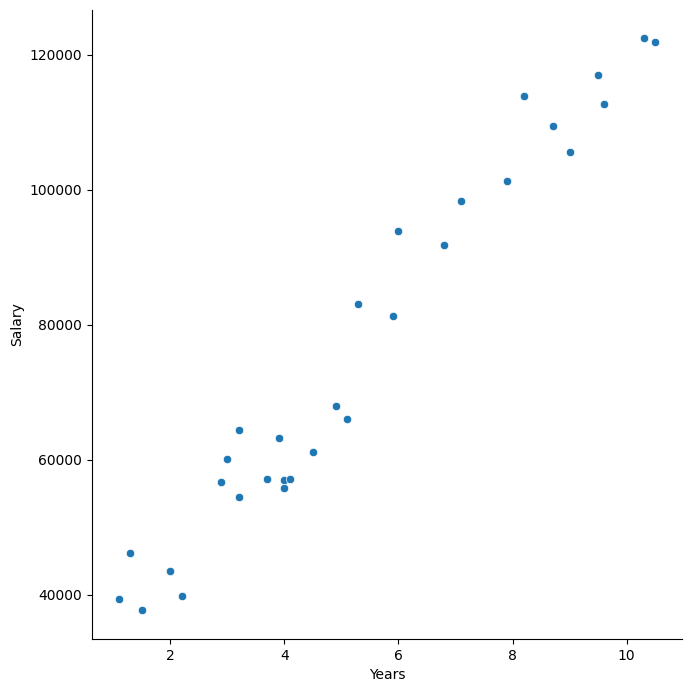

In [7]:
#Showing how the variables are scattered
plt.figure(figsize=(12,6))
sns.pairplot(df,x_vars=['YearsExperience'],y_vars=['Salary'],size=7,kind='scatter')
plt.xlabel('Years')
plt.ylabel('Salary')

<Axes: xlabel='Salary', ylabel='Count'>

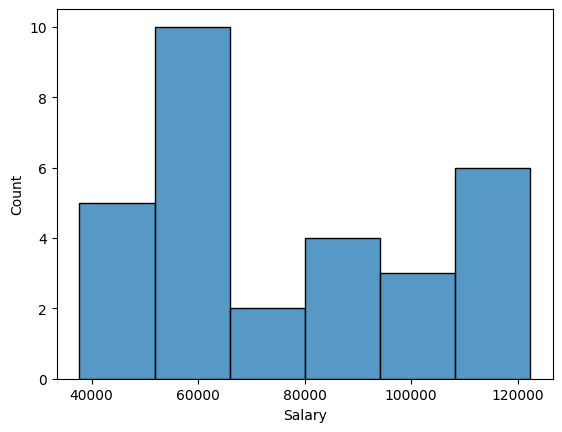

In [8]:
sns.histplot(df["Salary"])

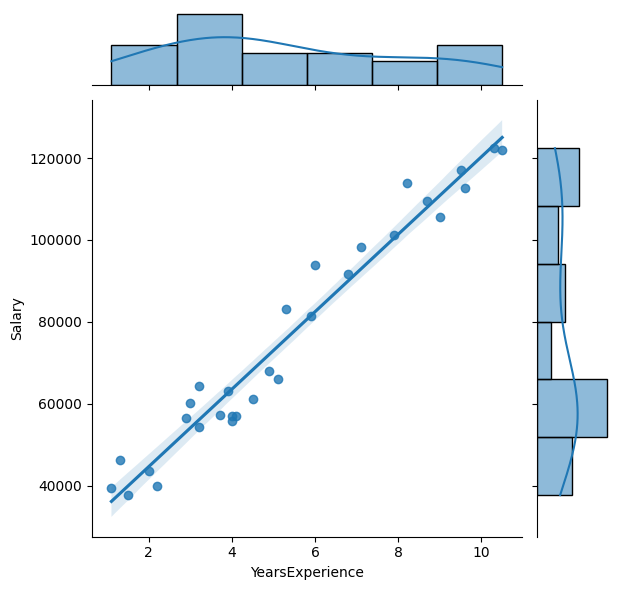

In [9]:
#Showing a regression line
sns.jointplot(x="YearsExperience", y="Salary", kind="reg", data=df)

In [10]:
#Checking for null values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

***Defining X data & Y data***

In [11]:
X=df['YearsExperience']
Y=df['Salary']

# ***Simple Linear Regression***

In [12]:
#Importing segregating data from scikit learn
from sklearn.model_selection import train_test_split

In [13]:
#Splitting the data for train and test 
X_train,X_test,y_train,y_test = train_test_split(X,Y, train_size=0.7,random_state=100)

In [14]:
#Create new axis for x column
X_train = X_train.to_numpy()  # Convert to NumPy array
X_test = X_test.to_numpy()
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

In [15]:
#Importing the model
from sklearn.linear_model import LinearRegression

In [16]:
#Fitting data to the model
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [17]:
#Predicting the Salary for the test values
y_predict = lr.predict(X_test)
y_predict

array([ 61208.34198766, 117649.32424949, 125434.28732008,  65100.82352296,
        53423.37891707,  64127.70313914, 118622.44463331, 112783.72233036,
        54396.49930089])

***Let,s check this with an example.
Assume that an employee has 3.4 years of experience and we want to predict salary.***

In [18]:
lr.predict([[3.4]])

array([58288.98083619])

In [19]:
pickle.dump(lr,open('model.pkl','wb'))

In [20]:
model=pickle.load(open('model.pkl','rb'))


*The predicted salary for an employee with 3.4 years is approximately 58289.*

**Analyzing the prediction**

Text(0.5, 1.0, 'Actual vs. Predicted')

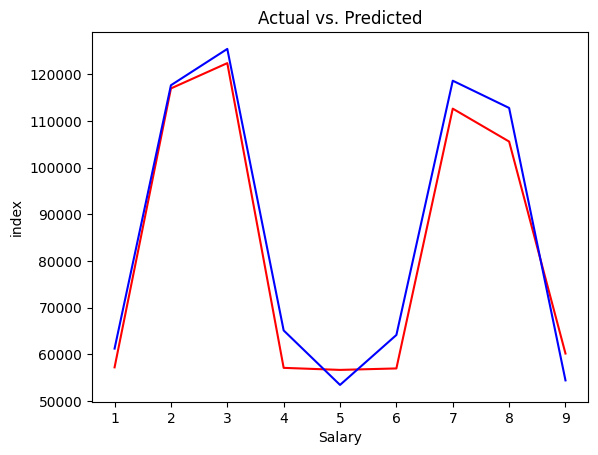

In [21]:
#Plotting the actual and predicted values
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_predict,color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Actual vs. Predicted')

Text(0.5, 1.0, 'Error Value')

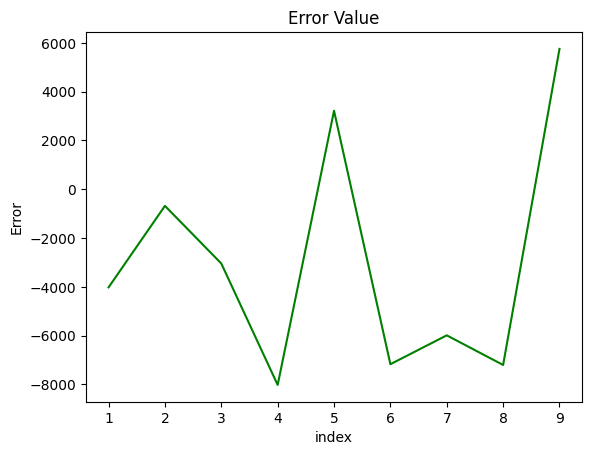

In [22]:
#Plotting the error
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-y_predict,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')

In [23]:
#Intercept and coeff of the line
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: 25202.88778615486
Coefficient of the line: [9731.20383825]


# Then it is said to form a line with
# y = 25202.8 + 9731.2x